# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 11 februari 2020

## Importeer libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.regularizers import l2
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D


## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [5]:
train_labels.shape

(60000,)

## Prepareer de images

In [6]:
train_images.shape

(60000, 28, 28)

Normaliseer de images!

In [7]:
train_images_normalized = train_images.astype('float32')/255

In [8]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [9]:
train_images_enhanced.shape

(60000, 28, 28, 1)

In [10]:
test_images_normalized = test_images.astype('float32')/255
test_images_enhanced = test_images.reshape(10000,28,28,1)

In [11]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [12]:
train_labels[1]

0

In [13]:

train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [14]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog een convolutie laag en nog een volledig verbonden laag toe

In [16]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D((2,2)))
cnn.add(Dropout(0.4))

cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dropout(0.25))
# ??? dense laag
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [18]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt


In [19]:
import time
start_time = time.time()
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 50,
        batch_size = 512,
        validation_data = (test_images_enhanced, test_labels_encoded))
end_time = time.time()
result = end_time - start_time
print(result)

Epoch 1/50
118/118 [==============================] - 5s 20ms/step - loss: 1.8992 - accuracy: 0.6291 - val_loss: 25.8505 - val_accuracy: 0.9355
Epoch 2/50
118/118 [==============================] - 1s 10ms/step - loss: 0.4130 - accuracy: 0.9354 - val_loss: 15.4913 - val_accuracy: 0.9611
Epoch 3/50
118/118 [==============================] - 1s 10ms/step - loss: 0.2557 - accuracy: 0.9533 - val_loss: 10.1102 - val_accuracy: 0.9709
Epoch 4/50
118/118 [==============================] - 1s 10ms/step - loss: 0.2075 - accuracy: 0.9602 - val_loss: 8.7663 - val_accuracy: 0.9763
Epoch 5/50
118/118 [==============================] - 1s 10ms/step - loss: 0.1866 - accuracy: 0.9638 - val_loss: 9.7890 - val_accuracy: 0.9745
Epoch 6/50
118/118 [==============================] - 1s 11ms/step - loss: 0.1684 - accuracy: 0.9673 - val_loss: 7.8675 - val_accuracy: 0.9786
Epoch 7/50
118/118 [==============================] - 1s 10ms/step - loss: 0.1603 - accuracy: 0.9696 - val_loss: 7.6304 - val_accuracy: 0.9

**OPDRACHT**: meet hoe lang het testen duurt

In [20]:
%%timeit
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)

print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
313/313 [==============================] - 1s 3ms/step - loss: 4.3809 - accuracy: 0.9885
0.9884999990463257
933 ms ± 43.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


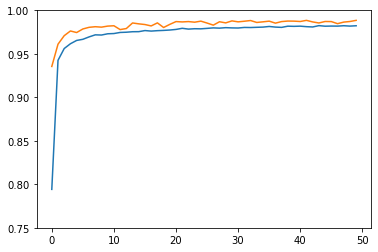

In [21]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.ylim(0.75,1.0)
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
* is het netwerk onder- of over-trained?
* wat kun je nog doen om de nauwkeurigheid te verhogen?

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)
De naukeurigheid is aanzienlijk beter dan de kNN en de NN.

Veranderingen:
MaxPooling in de middelste laag gezet, (2,2) bij de lagen gezet. Dit gaf een verhoging van 0.01. Daarna Dropouts getweakt om een top te krijgen van 0.9932
  Het gebruik van een regularizer werkte voor mij niet en maakte minder grote stappen als verwacht en liet de accuracy niet boven de 0.99 stijgen.

Meer veranderingen maken en kijken wat er verbeterd. En mogelijk een andere regulizer gebruiken of andere waarden gebruiken daarvoor ipv l2(0.01).

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?




Er is een verschil tussen kNN, NN en CNN met het testen en het fitten. Cnn is aanzienlijk sneller met het testen en bij Knn is dat andersom

CNN werkt beter dan kNN en NN
kNN maakt soms logische fouten en fouten die lastig zijn voor de mens om het goed te hebben.

NN is hier beter in maar doet hetzelfde.

CNN maakt alleen fouten die voor mensen lastig zijn.
